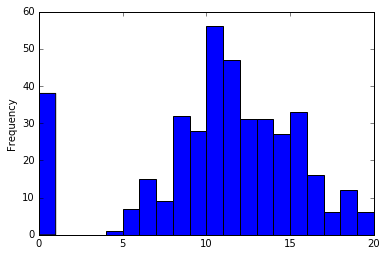

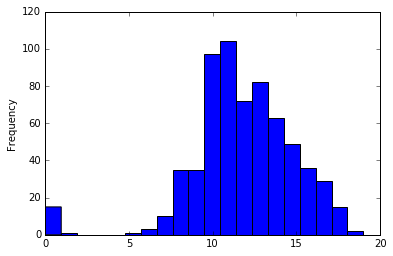

In [10]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

#importing data
df_math = pd.read_csv('data/student-mat.csv',delimiter = ';',header=0)
df_lang = pd.read_csv('data/student-por.csv',delimiter= ';',header=0)

#creating pass/fail column for G3 scores >= 10
#These columns will act as our labels 1 for pass 0 for fail
y_math = [1 if i >= 10 else 0 for i in df_math['G3']]
y_lang = [1 if i >= 10 else 0 for i in df_lang['G3']]

#turning lists into series for later manipulation
y_math = pd.Series(y_math)
y_lang = pd.Series(y_lang)

#remove the G1, G2, and G3 columns from the original df's to create df with feature data only
#it was noted that G1 and G2 scores were very good indicators of G3 scores but we want to be able to predict performance without any testing data
df_math_X = df_math.drop(['G1','G2','G3'], axis = 1)
df_lang_X = df_lang.drop(['G1','G2','G3'], axis = 1)

#create dummy variables for features like Gender and drop the first dummy column to elimintae duplicates in data
df_math_X = pd.get_dummies(df_math_X, drop_first = True)
df_lang_X = pd.get_dummies(df_lang_X, drop_first = True)

#plotting distribution of G3 scores
plt.figure()
df_math['G3'].plot.hist(bins=20)
plt.figure()
df_lang['G3'].plot.hist(bins=20)

plt.show()

In [11]:
#copied code for plotting confusion matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

265
549
395


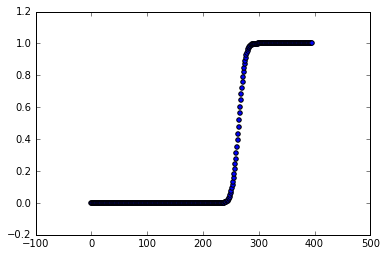

In [12]:
#Binomial CDF for Test scores
print y_math.sum()
print y_lang.sum()
print len(y_math)

def binomcdf(df): 
    n = len(df)
    p = df.sum() / float(n)   
    y = []
    for i in range(n):
        bi = stats.binom.cdf(i, n, p)
        y.append(bi)
          
    last = stats.binom.cdf(n, n, p)     
    y.append(last)
    x = np.arange(0,n+1,1)
    plt.scatter(x, y)
    plt.show()

binomcdf(y_math)

In [13]:
#Correlation values for each variable compared to the pass/fail coulmn

#'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'


#turning lists into series for later manipulation
y_math = pd.Series(y_math).astype(bool)

y_lang = pd.Series(y_lang).astype(bool)



#remove the G3 column from the original df's to create df with feature data only
df_math_X = df_math.drop(['G1','G2','G3'], axis = 1)
df_lang_X = df_lang.drop(['G1','G2','G3'], axis = 1)

#create dummy variables for features like Gender and drop the first dummy column to elimintae duplicates in data
df_math_X = pd.get_dummies(df_math_X, drop_first = True)
df_lang_X = pd.get_dummies(df_lang_X, drop_first = True)


#correlation functions for math and lang calss data set
def corr(df,y,class_name = 'course'):
    corr_dict = {}
    
    for i in list(df):
        corr = df[i].corr(y)
        corr_dict[i] = corr
    return corr_dict
    

#MATH and LANG CLASS CORRELATIONS
math_correlations = corr(df_math_X, y_math, 'math')
lang_correlations = corr(df_lang_X, y_lang, 'math')

for m in math_correlations.keys():
    print 'Correlation',m,' and passing for math and lang are: ', "{0:.3f}".format(math_correlations[m]),',',"{0:.3f}".format(lang_correlations[m])  


pd.scatter_matrix


Correlation Fjob_services  and passing for math and lang are:  -0.042 , -0.049
Correlation address_U  and passing for math and lang are:  0.052 , 0.127
Correlation Medu  and passing for math and lang are:  0.115 , 0.145
Correlation romantic_yes  and passing for math and lang are:  -0.098 , -0.081
Correlation absences  and passing for math and lang are:  -0.092 , -0.087
Correlation school_MS  and passing for math and lang are:  -0.031 , -0.297
Correlation internet_yes  and passing for math and lang are:  0.062 , 0.088
Correlation nursery_yes  and passing for math and lang are:  -0.009 , -0.008
Correlation Fjob_teacher  and passing for math and lang are:  0.053 , 0.047
Correlation studytime  and passing for math and lang are:  0.075 , 0.165
Correlation Mjob_other  and passing for math and lang are:  -0.074 , -0.020
Correlation Fedu  and passing for math and lang are:  0.108 , 0.146
Correlation health  and passing for math and lang are:  -0.066 , -0.010
Correlation Mjob_teacher  and passi

<function pandas.util._decorators.wrapper>

math model score:  0.697478991597
Confusion matrix, without normalization
[[17 22]
 [14 66]]
Normalized confusion matrix
[[ 0.44  0.56]
 [ 0.17  0.82]]


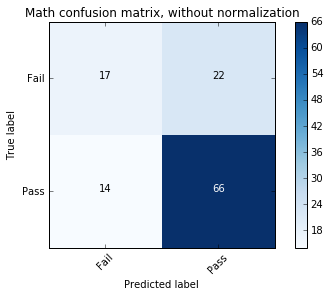

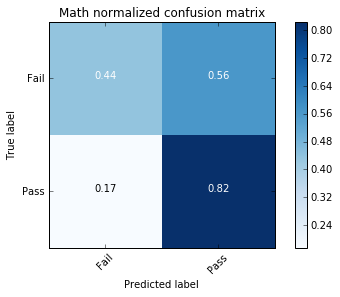

In [6]:
#MATH CLASS MODEL

# create calssifier
forest = RandomForestClassifier(n_estimators = 10)

# split data into training and test sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(df_math_X,y_math,test_size = 0.3, random_state = 21, stratify = y_math)

#fit classifier to math and lang training data
forest_m = forest.fit(X_train_m,y_train_m)

#predict y outcomes based on X testing data
#also return a score on how well model did
y_pred_m = forest.predict(X_test_m)
model_score_m = forest.score(X_test_m,y_test_m)
print "math model score: ",model_score_m

#confusion matrix and necessary plot variables
cm_m = confusion_matrix(y_test_m, y_pred_m)
class_names = ['Fail', 'Pass']
np.set_printoptions(precision=2)
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_m, classes=class_names,
                      title='Math confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_m, classes=class_names, normalize=True,
                      title='Math normalized confusion matrix')
plt.show()

lang model score:  0.846153846154
Confusion matrix, without normalization
[[  9  21]
 [  9 156]]
Normalized confusion matrix
[[ 0.3   0.7 ]
 [ 0.05  0.95]]


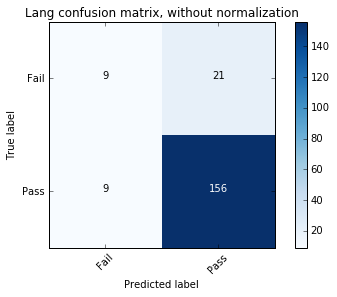

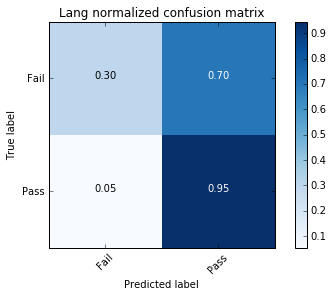

In [7]:
#LANG CLASS MODEL

# create calssifier
forest = RandomForestClassifier(n_estimators = 10)

# split data into training and test sets
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(df_lang_X,y_lang,test_size = 0.3, random_state = 21, stratify = y_lang)

#fit classifier to math and lang training data
forest_l = forest.fit(X_train_l,y_train_l)

#predict y outcomes based on X testing data
#also return a score on how well model did
y_pred_l = forest.predict(X_test_l)
model_score_l = forest.score(X_test_l,y_test_l)
print "lang model score: ",model_score_l

#confusion matrix plot function
cm_l = confusion_matrix(y_test_l, y_pred_l)
class_names = ['Fail', 'Pass']
np.set_printoptions(precision=2)

#Lang Confusion Matricies    
plt.figure()
plot_confusion_matrix(cm_l, classes=class_names,
                      title='Lang confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_l, classes=class_names, normalize=True,
                      title='Lang normalized confusion matrix')
plt.show()
